# Problem 1

In [25]:
import fitz
import pandas as pd
from collections import Counter

doc = fitz.open('dissertation.pdf')
text = "".join(page.get_text("text") for page in doc)
words = pd.Series(text.split())
words.value_counts().head(30)

the         2640
.           2323
of          1580
to          1384
and         1174
a            977
in           694
is           612
for          524
that         507
be           431
data         407
The          361
are          349
with         337
as           307
students     259
can          257
this         247
course       233
it           222
or           221
on           210
an           190
their        182
was          176
by           171
Data         171
not          168
I            155
dtype: int64

In [26]:
import camelot
tables = camelot.read_pdf('calendar.pdf')
df = tables[0].df
df

,0,1,2,3,4
0,Fall,2020 Fall Term,,2021 Fall Term,
1,First Day of Classes,Tue,September 1,Tue,August 31
2,Labor Day - Classes Will Meet,Mon,September 7,,
3,Labor Day - Classes Suspended,,,Mon,September 6
4,Last day to add or drop courses,Tue,September 15,Tue,September 14
...,...,...,...,...,...
70,Summer Session - 10 week - classes begin,Mon,June 7,Mon,June 6
71,Last day to add or drop courses,Wed,June 16,Wed,June 15
72,Last day to change registration or withdraw fr...,Thur,July 15,Thur,July 14
73,Final Exams,Fri,August 13,Fri,August 12


In [27]:
doc = fitz.open('syllabus.pdf')
text = "".join(page.get_text("text") for page in doc)
words = pd.Series(text.split())
words.value_counts().head(30)

          136
by         136
due        135
11:59pm     83
and         71
2021        71
the         59
to          54
8:30am      48
in          30
be          28
Mar         26
on          25
will        23
a           22
of          22
Apr         21
with        20
Quiz        18
you         17
your        16
for         16
Fri         15
C           14
May         14
is          14
Pi          14
that        13
(video)     13
Wed         13
dtype: int64

# Problem 2

In [28]:
import requests
data = requests.get("https://www.reddit.com/r/tumblr/.json", headers = {'User-agent': 'your bot 0.1'}).json()
children = []
for child in data['data']['children']:
    if child['data']['thumbnail'][-4:] in (".png", ".jpg", "jpeg"):
        childdict = {}
        childdict['title'] = child['data']['title']
        childdict['url'] = child['data']['url']
        children.append(childdict)
print(children)

[{'title': 'the struggle is real', 'url': 'https://i.redd.it/qzdkqdx2mvy61.png'}, {'title': '"What are you doing... enormous sibling?!"', 'url': 'https://i.imgur.com/6H14WTm.jpg'}, {'title': 'A plot thread SAO was too afraid to commit to', 'url': 'https://i.redd.it/dyatm7dbtvy61.png'}, {'title': 'hebrew and japanese', 'url': 'https://i.redd.it/xasnw4saavy61.jpg'}, {'title': 'As a frequenter of r/mbti.... damn...', 'url': 'https://i.redd.it/w4raun279vy61.jpg'}, {'title': 'Gently float', 'url': 'https://i.imgur.com/GXyCunQ.jpg'}, {'title': 'butter crisis', 'url': 'https://i.redd.it/sjd3esjkzvy61.jpg'}, {'title': 'Dear Margaret', 'url': 'https://i.redd.it/xgktns5qbuy61.png'}, {'title': 'Flashback episode', 'url': 'https://i.redd.it/f0ib0reihty61.jpg'}, {'title': 'EU Nations', 'url': 'https://i.redd.it/8c8dngbgnvy61.jpg'}, {'title': 'D O U G - D I M M A D A G G E R', 'url': 'https://i.redd.it/me86vhinfvy61.jpg'}, {'title': 'How to subtly hint you watch documentaries....', 'url': 'https://i

In [48]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
import io
all_text = ""
for child in children:
    response = requests.get(child['url'])
    img = Image.open(io.BytesIO(response.content))
    text = pytesseract.image_to_string(img)
    all_text+=(text)

In [40]:
words = pd.Series(all_text.split())
print(words.value_counts())

the                47
and                44
a                  39
to                 32
is                 27
                   ..
led                 1
admires             1
smartasticalart     1
cultural            1
emu                 1
Length: 1086, dtype: int64


In [41]:
from textblob import TextBlob

blob = TextBlob(all_text)
print(blob.noun_phrases)

# Sorted with pandas
pd.Series(blob.word_counts).sort_values().tail(30)

['imagine', 'people ’ s hair color', 'eye color /every person', 'brown hair', 'brown eyes sighs', 'red heads', 'aren ’ t', 'way round', '’ d', 'neato “', 'people sighs', 'ww', 'party slogan ‘', 'brother', 'enormous sibling', 'hard |', 'brother enormous sibling', 'es chefpyro', 'hiavelun', 'om- sy', 'ke', 'avar- ] ofe', 'mi of-xo', 'nav', '=e [ ole ] mukole-talcyo [ -yale\\-lauual-laalosowe', 'wolu mau imiu', '.d1ave exe', 'vi', '] 80. gs chefpyro', 'maat=m=\\va-1m', 'ale |tom ex-vacxe', 'avatar foro', 'efelarel [ ale moma al-\\imr-lss-1', 'e ] al-te', '|-lalel-\\eal mi celan', 'oxe¥s1 <', '> oo', '® cd machigaeru', 'hebrew', '| don ’ t', 'cultural whiplash', 'years learning', 'japanese teachers', 'hebrew', 'israeli', 'hebrew', 'teacher insults', 'back +', 'nevermind keigo', 'hebrew', 'someone', '“ excuse', 'entire kanji', 'hebrew', '‘ bastard ’', 'direct ‘', '’ pronoun', 'hebrew', '‘ bitch ’', 'b®', 'human experience', 'b loveyatothemoonandback # japanese', '# hebrew', 'tags 2. i', 'so

be         9
has        9
just       9
all        9
my        10
m         10
we        10
follow    10
an        10
but       11
e         13
in        13
”         13
me        13
was       14
on        15
“         15
like      17
that      19
i         19
it        20
this      21
’         21
of        22
is        28
you       32
to        32
a         41
and       44
the       52
dtype: int64

In [52]:
# using first post for simplicity
response = requests.get(children[0]['url'])
img = Image.open(io.BytesIO(response.content))
text = pytesseract.image_to_string(img)
print(text)
blob = TextBlob(text)
print("Polarity:",blob.sentiment.polarity)
# Value from -1 to 1 about how positive/negative the post's words are

 

firetrucking-himym:

Imagine if people’s hair color
matched their eye color

/every person who has brown
hair and brown eyes sighs
deeply

red heads would in fact be
satanic

Why aren’t we thinking about this
the other way round. If your hair
looked like your eyes that’d be
neato

“brown eyed people sighs deeply
again”

 

 

Polarity: -0.08125


In [47]:
import requests
data = requests.get("https://www.reddit.com/r/wholesomememes/.json", headers = {'User-agent': 'your bot 0.1'}).json()
children2 = []
for child in data['data']['children']:
    if child['data']['thumbnail'][-4:] in (".png", ".jpg", "jpeg"):
        childdict = {}
        childdict['title'] = child['data']['title']
        childdict['url'] = child['data']['url']
        children2.append(childdict)
print(children2)

[{'title': 'The best kind of relationship!', 'url': 'https://i.imgur.com/nHAAsOk.jpg'}, {'title': 'A toy tiger.', 'url': 'https://i.redd.it/jfi5y9fkiwy61.jpg'}, {'title': 'I don’t know if this has been made yet, but it happened to me the other day 😌', 'url': 'https://i.redd.it/7trb69e4ovy61.jpg'}, {'title': 'A compliment can make someone’s day', 'url': 'https://i.redd.it/0ogf1ia6zwy61.jpg'}, {'title': "A ladies' man.", 'url': 'https://i.redd.it/73a58a54lxy61.jpg'}, {'title': 'Spending time together', 'url': 'https://i.redd.it/x858v4ciawy61.jpg'}, {'title': 'Germany moment', 'url': 'https://i.redd.it/i5vs65a4xxy61.jpg'}, {'title': 'hope it he likes it', 'url': 'https://i.redd.it/2y65gxb9svy61.jpg'}, {'title': '“I Understand You”', 'url': 'https://i.redd.it/onphqjosbvy61.jpg'}, {'title': 'Waiting at the traffic lights', 'url': 'https://i.redd.it/drrk1blo4yy61.png'}, {'title': 'Ill repay you next time :)', 'url': 'https://i.redd.it/2ezgjtytyvy61.jpg'}, {'title': 'Heard that this meme woul

In [49]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
import io
all_text = ""
for child in children2:
    response = requests.get(child['url'])
    img = Image.open(io.BytesIO(response.content))
    text = pytesseract.image_to_string(img)
    all_text+=(text)
words = pd.Series(all_text.split())
print(words.value_counts())

the       10
a          9
you        6
my         5
me         5
          ..
Chitin     1
sh         1
any        1
drive      1
they       1
Length: 247, dtype: int64


# Visualizing Polarity of Memes on r/Tumblr vs r/WholesomeMemes

In [56]:
polarization_data = []
for child in children:
    response = requests.get(child['url'])
    img = Image.open(io.BytesIO(response.content))
    text = pytesseract.image_to_string(img)
    blob = TextBlob(text)
    if text:
        polarization_data.append(['tumblr', blob.sentiment.polarity])
for child in children2:
    response = requests.get(child['url'])
    img = Image.open(io.BytesIO(response.content))
    text = pytesseract.image_to_string(img)
    blob = TextBlob(text)
    if text:
        polarization_data.append(['wholesome', blob.sentiment.polarity])

df = pd.DataFrame(polarization_data, columns = ['Subreddit', 'Polarity'])
df

,Subreddit,Polarity
0,tumblr,-0.081250
1,tumblr,-0.037585
2,tumblr,0.116667
3,tumblr,-0.046059
4,tumblr,-0.202083
...,...,...
95,wholesome,0.000000
96,wholesome,0.000000
97,wholesome,0.000000
98,wholesome,-0.430556


Text(0.5, 1.0, 'Polarity in Meme Text: r/Tumblr vs r/WholesomeMemes')

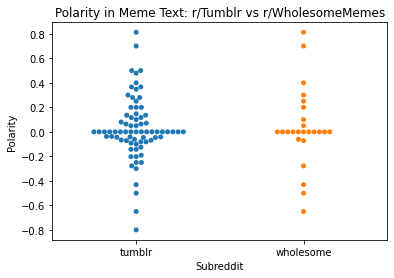

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.swarmplot(x = 'Subreddit', y = 'Polarity', data = df)
plt.title("Polarity in Meme Text: r/Tumblr vs r/WholesomeMemes")

# Problem 3

In [66]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread('IMG_20190201_183404065.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()